# Sistema de lógica difusa para encontrar centrocampistas jovenes con un buen potencial

Este ejemplo muestra cómo crear un sistema experto con lógica difusa para detectar centro-campistas jóvenes con buen potencial.Nos basaremos en el trabajo de Luka Radovanović, un estudiante de la Universidad de Belgrado. El resultado del trabajo se puede encontrar en: https://github.com/lukadlm97/football-manager-resching/tree/master

## Planteamiento del problema

Uno de los problemas que encuentran los equipos de fútbol es la detección de jugadores jóvenes con potencial. Es por eso que estamos creando un sistema expertos con lógica difusa que nos ayude a detectar centrocampistas ofensivos jóvenes con potencial.

Hemos elegido la posición de un centrocampista ofensivo porque es una posición de lo más difícil de encontrar y, por lo tanto, es una posición que los equipos están buscando mucho.Además, es una posición en la que muchos de los mejores jugadores de la historia han jugado, como: Di Stefano, Maradona, Zidane, Platini, etc.

## Pasos previos

Necesitamos instalar la libreria scikit-fuzzy, pero no podemos usar la última versión (0.5), con la 0.4.2 es suficiente.

In [2]:
%pip install scikit-fuzzy==0.4.2 #La libreria 0.5 es más reciente pero tiene problemas con el ControlSystem.view()

# Comprobar versión de Python (opcional pero recomendado)
!python --version

# Instalar versiones compatibles
%pip install --upgrade pip
%pip install numpy pandas matplotlib scikit-fuzzy==0.4.2

# Comprobamos versión de Python (DEBE ser 3.10)
!python --version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894076 sha256=5ea7e17e018bfa3f8ed83ee2c2cf8f23f9fee7041952b024f03a749539f3a307
  Stored in directory: /root/.cache/pip/wheels/b1/67/d1/6c29aeb1cd2d36447ad5b0de027580b8894aff702a9b50041e
Successfully built scikit-fuzzy
Python 3.11.13
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Python 3.11.13


## Anàlisi de les dades

Primero cargamos los datos (`EX2.-players_22.csv`) y vemos cómo están estructurados.
Cargaremos los datos en un DataFrame de datos de Pandas y observaremos las primeras filas.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import skfuzzy as fuzz
from skfuzzy import control as ctrl

df = pd.read_csv('EX2.-players_22.csv')
df

/tmp/ipython-input-13-749993839.py:8: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EX2.-players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


También será útil para nosotros que nos describan los datos para conocer su distribución.

In [ ]:
df.describe()

Como hemos dicho, estamos buscando un centro-campista ofensivo joven, por lo que eliminaremos a todos los jugadores que no juegan en esta posición (CAM - Center Attacking Midfielders) o tienen más de 24 años.

In [ ]:
df = df[(df['player_positions'].str.contains('CAM')) & (df['age'] <= 24)]
df

## Análisis del potencial

Para hacer una primera aproximación al potencial de los jugadores, hemos hecho una primera hipótesis que nos dice que los jugadores más potenciales son aquellos que son muy jóvenes y tienen una gran habilidad para pasar la pelota.

Luego crearemos un sistema difuso con dos variables de entrada: la edad y la capacidad de pasar la pelota. La variable de salida será el potencial.

El resumen de las reglas propuestas es el siguiente:

### Relación entre la edad y la categoría lingüística

| Edad  | Categoría    |
|-------|--------------|
| 16-18 | Joven        |
| 17-21 | Junior       |
| 20-24 | Senior-joven |

### Relación entre la capacidad de pasar la pelota y la categoría lingüística

| Pasar la pelota | Categoría   |
|-----------------|-------------|
| <=60            | Baja        |
| 60-85           | Promedia    |
| >=80-100        | Alta        |

### Relación entre la categoría lingüística de potencial y su valor numérico

Las variables de salida serán triangulares.

| Potencial | Valor numérico |
|-----------|----------------|
| Bajo      | <40            |
| Promedio  | 10 - 90        |
| Alto      | 60 - 100       |

Define los antecedentes y la consecuencia con sus funciones de adhesión.

In [7]:
# define aquí los antecedentes y el consecuente y a continuación cada una de las funciones de pertenencia (edad, calidad_pasada, potencial)
edad = ctrl.Antecedent(np.arange(16, 25, 1), 'edad')

calidad_pase = ctrl.Antecedent(np.arange(0, 101, 1), 'calidad_pase')

potencial = ctrl.Consequent(np.arange(0, 101, 1), 'potencial')


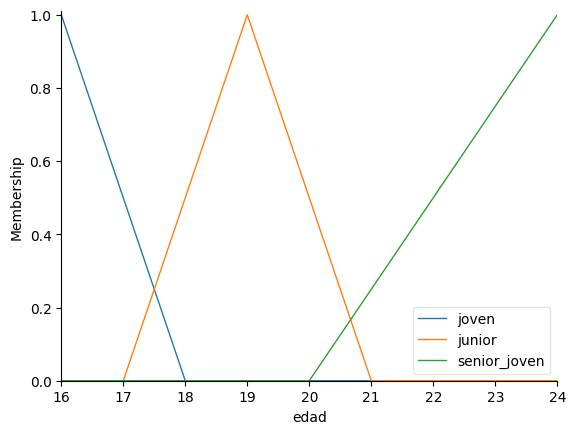

In [28]:
# define la función de pertenencia para edad y visualizala
edad['joven'] = fuzz.trimf(edad.universe, [16, 16, 18])
edad['junior'] = fuzz.trimf(edad.universe, [17, 19, 21])
edad['senior_joven'] = fuzz.trimf(edad.universe, [20, 24, 24])
edad.view()


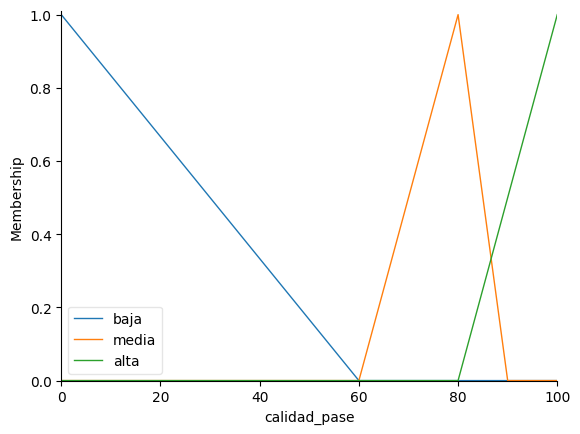

In [27]:
# define la función de pertenencia para calidad_pasada y visualizala
calidad_pase['baja'] = fuzz.trimf(calidad_pase.universe, [0, 0, 60])
calidad_pase['media'] = fuzz.trimf(calidad_pase.universe, [60, 80, 90])
calidad_pase['alta'] = fuzz.trimf(calidad_pase.universe, [80, 100, 100])

calidad_pase.view()


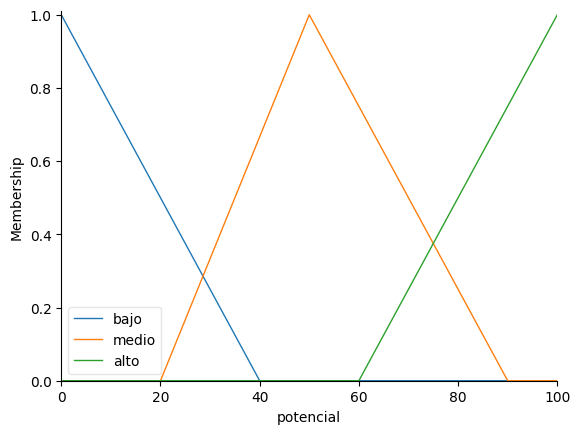

In [26]:
# define la función de pertenencia para potencial y visualizala
potencial['bajo'] = fuzz.trimf(potencial.universe, [0, 0, 40])
potencial['medio'] = fuzz.trimf(potencial.universe, [20, 50, 90])
potencial['alto'] = fuzz.trimf(potencial.universe, [60, 100, 100])
potencial.view()


## Reglas

Debemos definir las reglas que relacionan las variables de entrada con la variable de salida. Será lo siguiente:

| Edad         | Calidad pasada | Potencial |
|--------------|----------------|-----------|
| Joven        | Alta           | Alto      |
| Joven        | Promedia       | Promedio  |
| Joven        | Baixa          | Promedio  |
| Junior       | Alta           | Alto      |
| Junior       | Promedia       | Promedio  |
| Junior       | Baixa          | Bajo      |
| Senior-joven | Alta           | Alto      |
| Senior-joven | Promedia       | Bajo      |
| Senior-joven | Baixa          | Bajo      |

Cree las reglas para nuestro sistema y el sistema de control. Ver las dependencias.

In [29]:
# Define aquí las reglas
rule1 = ctrl.Rule(edad['joven'] & calidad_pase['alta'], potencial['alto'])
rule2 = ctrl.Rule(edad['joven'] & calidad_pase['media'], potencial['medio'])
rule3 = ctrl.Rule(edad['joven'] & calidad_pase['baja'], potencial['medio'])

rule4 = ctrl.Rule(edad['junior'] & calidad_pase['alta'], potencial['alto'])
rule5 = ctrl.Rule(edad['junior'] & calidad_pase['media'], potencial['medio'])
rule6 = ctrl.Rule(edad['junior'] & calidad_pase['baja'], potencial['bajo'])

rule7 = ctrl.Rule(edad['senior_joven'] & calidad_pase['alta'], potencial['alto'])
rule8 = ctrl.Rule(edad['senior_joven'] & calidad_pase['media'], potencial['bajo'])
rule9 = ctrl.Rule(edad['senior_joven'] & calidad_pase['baja'], potencial['bajo'])



In [30]:
# Añadelas al sistema de control
potencial_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3,
    rule4, rule5, rule6,
    rule7, rule8, rule9
])

# Crear la simulación
potencial_sim = ctrl.ControlSystemSimulation(potencial_ctrl)


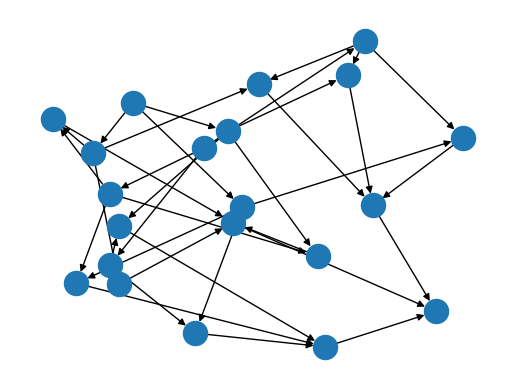

In [31]:
# Visualizalas
potencial_ctrl.view()


Antes de aplicar nuestro modelo a todos los datos que tenemos, debemos probarlo con un par de ejemplos.
¿Cuál será el potencial de un jugador de 17 años y un pase de 40? ¿Y si tuviera un pase de 80? También evalúa los dos casos anteriores si tenía 23 años.

In [32]:
# Realiza la simulación
potencial_sim = ctrl.ControlSystemSimulation(potencial_ctrl)


Potencial (17 años, pase 40): 54.222222222222186


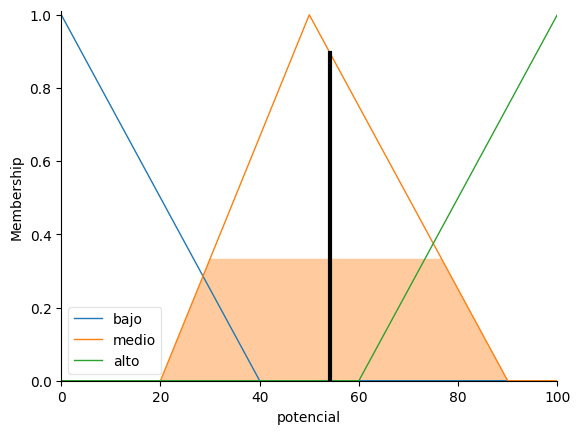

In [38]:
# Carga los datos para el primer caso de prueba
potencial_sim.input['edad'] = 17
potencial_sim.input['calidad_pase'] = 40

# Computa la solución
potencial_sim.compute()

# Visualiza el resultado
print("Potencial (17 años, pase 40):", potencial_sim.output['potencial'])
potencial.view(sim=potencial_sim)


Potencial (17 años, pase 80): 53.88888888888884


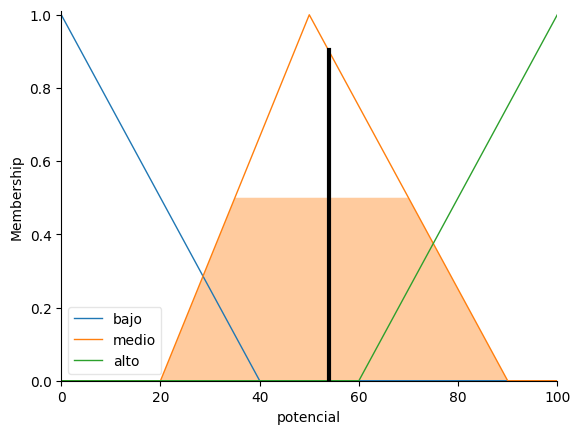

In [37]:
# Carga los datos para el segundo caso de prueba
potencial_sim.input['edad'] = 17
potencial_sim.input['calidad_pase'] = 80

# Computa la solución
potencial_sim.compute()

# Visualiza la solución
print("Potencial (17 años, pase 80):", potencial_sim.output['potencial'])
potencial.view(sim=potencial_sim)


Potencial (23 años, pase 40): 16.888888888888893


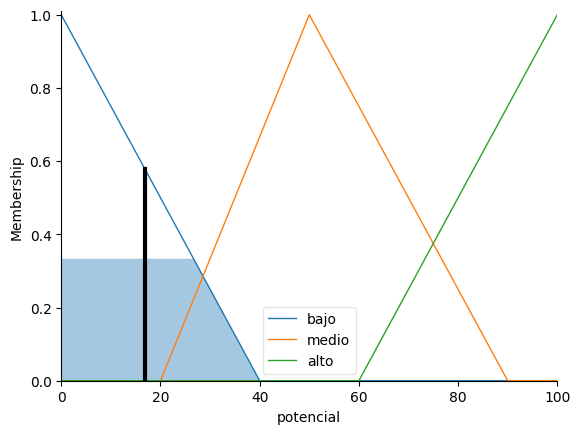

In [35]:
# Carga los datos para el primer caso de prueba pero con 23 años
potencial_sim.input['edad'] = 23
potencial_sim.input['calidad_pase'] = 40

# Computa la solución
potencial_sim.compute()

# Visualiza la solución
print("Potencial (23 años, pase 40):", potencial_sim.output['potencial'])
potencial.view(sim=potencial_sim)


Potencial (23 años, pase 80): 16.888888888888893


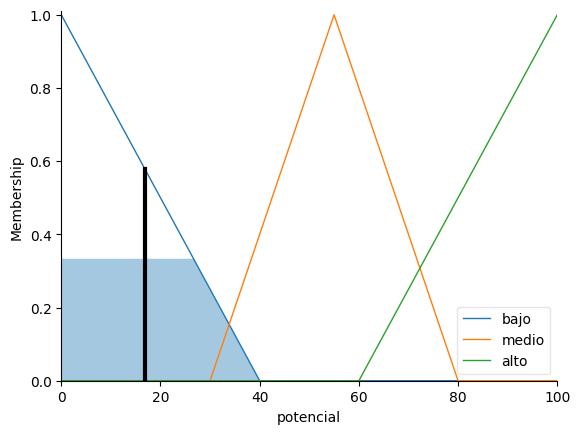

In [20]:
# Carga los datos para el segundo caso de prueba pero con 23 años
potencial_sim.input['edad'] = 23
potencial_sim.input['calidad_pase'] = 80

# Computa la solución
potencial_sim.compute()

# Visualiza la solución
print("Potencial (23 años, pase 80):", potencial_sim.output['potencial'])
potencial.view(sim=potencial_sim)


## Actualitzar el DataFrame

Actualiza el DataFrame con los datos calculados por nuestro modelo. Crea una columna llamada "potencial" con los datos que hemos calculado.

In [25]:
# Crea la columna potencial con los datos que hemos calculado

def potencial_jugador(row):
    try:
        potencial_sim.input['edad'] = row['age']
        potencial_sim.input['calidad_pase'] = row['passing']
        potencial_sim.compute()
        return potencial_sim.output['potencial']
    except:
        return None

df = df.copy()

# Creamos la columna potencial usando apply
df.loc[:, 'potencial'] = df.apply(potencial_jugador, axis=1)

df.head()


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,potencial
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,NaN
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,NaN
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,NaN
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png,NaN


## Conclusiones

Si observamos los resultados, podemos concluir que nuestro modelo es bastante consistente, incluso si los números no son del todo realistas.
¿Cómo podemos mejorar el modelo? Agrega cierta mejora o basate en el trabajo de Luka Radovanović y comenta los resultados.

In [ ]:
# Agrega las celdas de código que necesites

Agrega también las celdas de markdown que necesites para explicarlo

# Entrega

Una vez completado el Notebook y ejecutado completamente (comprueba que funcionan todas las celdas) y añadidas las mejoras. Envialo a la tarea correspondiente de AULES.